In [23]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

## 📚 Fundamentos Teóricos

### Definición

Sea $f(x)$ una función continua en el intervalo $[a, b]$.

La **integral definida** de $f(x)$ entre los límites $a$ y $b$ es el **acumulado neto** de los valores de $f(x)$ en ese intervalo, y se denota:

$$\int_a^b f(x)\,dx = F(b) - F(a)$$

donde $F(x)$ es una **antiderivada** de $f(x)$ (es decir, $F'(x) = f(x)$).

Esta expresión se conoce como **Regla de Barrow** o **Teorema Fundamental del Cálculo**.

### Interpretación Geométrica

Geométricamente, la integral definida representa el **área bajo la curva** de $f(x)$ entre $a$ y $b$:

- Si $f(x) \geq 0$ en $[a,b]$: el área es positiva
- Si $f(x) \leq 0$ en $[a,b]$: el área es negativa (representa área "bajo" el eje x)
- Si $f(x)$ cambia de signo: la integral es el área neta (suma algebraica)

### Interpretación Económica

En economía, las integrales definidas permiten calcular:

- **Excedentes**: del consumidor y del productor
- **Acumulados**: ingresos totales, costos variables totales
- **Bienestar**: pérdida de peso muerto (deadweight loss)
- **Valores presentes**: flujos de caja descontados


## 🔧 Metodología de Resolución: 7 Pasos

Para resolver problemas de integrales definidas con aplicación económica, seguimos esta metodología sistemática:

### ✅ Paso 1: Planteo
- Definir variables simbólicas
- Establecer la función a integrar $f(x)$
- Especificar límites de integración $[a, b]$

### ✅ Paso 2: Antiderivada y Barrow
- Hallar la antiderivada $F(x)$ tal que $F'(x) = f(x)$
- Aplicar Regla de Barrow: $F(b) - F(a)$

### ✅ Paso 3: Integración con SymPy
- Usar `sp.integrate(f, (x, a, b))` para calcular el valor exacto
- Comparar con resultado manual del Paso 2

### ✅ Paso 4: Verificación
- Derivar $F(x)$ para confirmar que $F'(x) = f(x)$
- Validar consistencia entre métodos

### ✅ Paso 5: Aproximación numérica
- Calcular integral usando sumas de Riemann
- Comparar con valor exacto de SymPy
- Evaluar error de aproximación

### ✅ Paso 6: Visualización
- Graficar función $f(x)$
- Sombrear área bajo la curva entre $[a, b]$
- Incluir líneas de referencia

### ✅ Paso 7: Interpretación económica
- Explicar significado del valor obtenido
- Conectar con conceptos económicos relevantes
- Contextualizar en términos de negocio


---

## 📊 EJEMPLO 1: Función Polinómica Simple

### Contexto
Una empresa estudia la tasa de crecimiento de su producción mensual, modelada por $f(q) = 2q + 3$ (unidades adicionales por mes). Se desea calcular el **incremento total de producción** entre el mes 2 y el mes 5.


### ✅ Paso 1: Planteo


In [24]:
# Definir variable simbólica
q = sp.symbols('q', real=True, positive=True)

# Función: tasa de crecimiento de producción
f = 2*q + 3

# Límites de integración: meses 2 a 5
a = 2
b = 5

print("✅ PASO 1 - PLANTEO")
print("=" * 60)
print(f"Función: f(q) = {f}")
print(f"Límites: a = {a}, b = {b}")
print(f"Objetivo: Calcular ∫[{a},{b}] f(q) dq")

✅ PASO 1 - PLANTEO
Función: f(q) = 2*q + 3
Límites: a = 2, b = 5
Objetivo: Calcular ∫[2,5] f(q) dq


### ✅ Paso 2: Antiderivada y Barrow


In [25]:
# Calcular antiderivada F(q) manualmente
F = sp.integrate(f, q)

# Aplicar Regla de Barrow: F(b) - F(a)
F_b = F.subs(q, b)
F_a = F.subs(q, a)
resultado_barrow = F_b - F_a

print("✅ PASO 2 - ANTIDERIVADA Y BARROW")
print("=" * 60)
print(f"Antiderivada: F(q) = {F}")
print(f"F({b}) = {F_b}")
print(f"F({a}) = {F_a}")
print(f"F({b}) - F({a}) = {resultado_barrow}")

✅ PASO 2 - ANTIDERIVADA Y BARROW
Antiderivada: F(q) = q**2 + 3*q
F(5) = 40
F(2) = 10
F(5) - F(2) = 30


### ✅ Paso 3: Integración con SymPy


In [26]:
# Calcular integral definida usando SymPy
resultado_sympy = sp.integrate(f, (q, a, b))

print("✅ PASO 3 - INTEGRACIÓN CON SYMPY")
print("=" * 60)
print(f"∫[{a},{b}] ({f}) dq = {resultado_sympy}")
print(f"Coincide con Barrow: {resultado_barrow == resultado_sympy}")

✅ PASO 3 - INTEGRACIÓN CON SYMPY
∫[2,5] (2*q + 3) dq = 30
Coincide con Barrow: True


### ✅ Paso 4: Verificación


In [27]:
# Verificar que la derivada de F es f
derivada_F = sp.diff(F, q)

print("✅ PASO 4 - VERIFICACIÓN")
print("=" * 60)
print(f"F(q) = {F}")
print(f"F'(q) = {derivada_F}")
print(f"f(q) = {f}")
print(f"¿F'(q) = f(q)? {sp.simplify(derivada_F - f) == 0}")

✅ PASO 4 - VERIFICACIÓN
F(q) = q**2 + 3*q
F'(q) = 2*q + 3
f(q) = 2*q + 3
¿F'(q) = f(q)? True


### ✅ Paso 5: Aproximación numérica


In [28]:
# Aproximación por suma de Riemann (punto medio)
n = 100  # Número de subdivisiones
q_edges = np.linspace(float(a), float(b), n+1)
q_samples = (q_edges[:-1] + q_edges[1:]) / 2  # Puntos medios
dq = (float(b) - float(a)) / n

# Evaluar función en puntos medios
f_lambdify = sp.lambdify(q, f, 'numpy')
alturas = f_lambdify(q_samples)

# Calcular suma de Riemann
riemann_sum = np.sum(alturas * dq)

# Error relativo
error_abs = abs(float(resultado_sympy) - riemann_sum)
error_rel = (error_abs / float(resultado_sympy)) * 100

print("✅ PASO 5 - APROXIMACIÓN NUMÉRICA")
print("=" * 60)
print(f"Subdivisiones: n = {n}")
print(f"Suma de Riemann: {riemann_sum:.10f}")
print(f"Valor exacto (SymPy): {float(resultado_sympy):.10f}")
print(f"Error absoluto: {error_abs:.10f}")
print(f"Error relativo: {error_rel:.6f}%")

✅ PASO 5 - APROXIMACIÓN NUMÉRICA
Subdivisiones: n = 100
Suma de Riemann: 30.0000000000
Valor exacto (SymPy): 30.0000000000
Error absoluto: 0.0000000000
Error relativo: 0.000000%


### ✅ Paso 6: Visualización


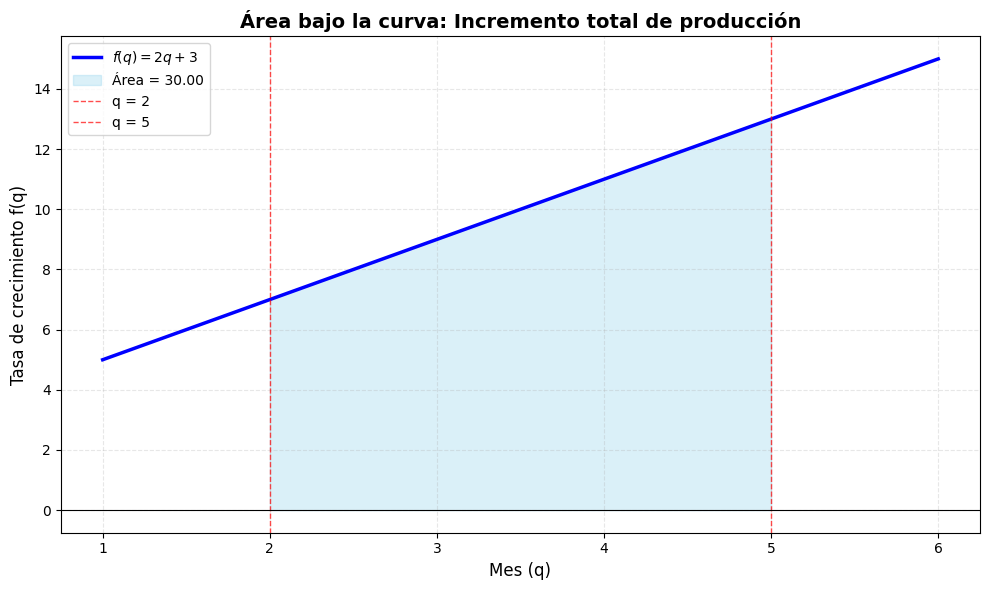

In [29]:
# Crear curva completa
q_full = np.linspace(float(a) - 1, float(b) + 1, 1000)
f_full = f_lambdify(q_full)

# Crear curva para área sombreada
q_fill = np.linspace(float(a), float(b), 500)
f_fill = f_lambdify(q_fill)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(q_full, f_full, label=f'$f(q) = {sp.latex(f)}$', linewidth=2.5, color='blue')
plt.fill_between(q_fill, f_fill, alpha=0.3, color='skyblue', 
                 label=f'Área = {float(resultado_sympy):.2f}')

# Líneas de referencia
plt.axvline(a, color='red', linestyle='--', linewidth=1, alpha=0.7, label=f'q = {a}')
plt.axvline(b, color='red', linestyle='--', linewidth=1, alpha=0.7, label=f'q = {b}')
plt.axhline(0, color='black', linewidth=0.8)

plt.title('Área bajo la curva: Incremento total de producción', fontsize=14, fontweight='bold')
plt.xlabel('Mes (q)', fontsize=12)
plt.ylabel('Tasa de crecimiento f(q)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

### ✅ Paso 7: Interpretación económica


In [30]:
print("✅ PASO 7 - INTERPRETACIÓN ECONÓMICA")
print("=" * 60)
print(f"El incremento total de producción entre el mes {a} y el mes {b}")
print(f"es de {float(resultado_sympy)} unidades.")
print()
print("Significado:")
print(f"  • La tasa de crecimiento f(q) = {f} es positiva y creciente")
print(f"  • Durante 3 meses ({b}-{a}), la producción aumentó {float(resultado_sympy)} unidades")
print(f"  • Promedio mensual: {float(resultado_sympy)/(b-a):.2f} unidades/mes")
print()
print("Aplicación empresarial:")
print("  Este valor permite planificar inventarios, recursos humanos")
print("  y capacidad de producción para satisfacer la demanda futura.")

✅ PASO 7 - INTERPRETACIÓN ECONÓMICA
El incremento total de producción entre el mes 2 y el mes 5
es de 30.0 unidades.

Significado:
  • La tasa de crecimiento f(q) = 2*q + 3 es positiva y creciente
  • Durante 3 meses (5-2), la producción aumentó 30.0 unidades
  • Promedio mensual: 10.00 unidades/mes

Aplicación empresarial:
  Este valor permite planificar inventarios, recursos humanos
  y capacidad de producción para satisfacer la demanda futura.


---

## 📊 EJEMPLO 2: Excedente del Consumidor y del Productor

### Contexto
Un mercado competitivo tiene funciones de demanda y oferta inversas:
- Demanda inversa: $P_d(q) = 50 - 2q$
- Oferta inversa: $P_s(q) = 10 + q$

Se desea calcular el **excedente del consumidor (EC)** y el **excedente del productor (EP)** en equilibrio.


### ✅ Paso 1: Planteo


In [31]:
# Definir variable simbólica
q = sp.symbols('q', real=True, positive=True)

# Funciones inversas
P_d = 50 - 2*q  # Demanda inversa
P_s = 10 + q    # Oferta inversa

# Encontrar equilibrio
q_eq = sp.solve(sp.Eq(P_d, P_s), q)[0]
p_eq = P_d.subs(q, q_eq)

print("✅ PASO 1 - PLANTEO")
print("=" * 60)
print(f"Demanda inversa: P_d(q) = {P_d}")
print(f"Oferta inversa: P_s(q) = {P_s}")
print(f"Equilibrio: q* = {q_eq}, p* = {p_eq}")
print()
print("Objetivos:")
print(f"  • EC = ∫[0, {q_eq}] [P_d(q) - {p_eq}] dq")
print(f"  • EP = ∫[0, {q_eq}] [{p_eq} - P_s(q)] dq")

✅ PASO 1 - PLANTEO
Demanda inversa: P_d(q) = 50 - 2*q
Oferta inversa: P_s(q) = q + 10
Equilibrio: q* = 40/3, p* = 70/3

Objetivos:
  • EC = ∫[0, 40/3] [P_d(q) - 70/3] dq
  • EP = ∫[0, 40/3] [70/3 - P_s(q)] dq


### ✅ Paso 2: Antiderivada y Barrow

In [32]:
# Excedente del Consumidor (EC)
integrando_EC = P_d - p_eq
F_EC = sp.integrate(integrando_EC, q)
EC_barrow = F_EC.subs(q, q_eq) - F_EC.subs(q, 0)

print("✅ PASO 2 - ANTIDERIVADA Y BARROW")
print("=" * 60)
print("EXCEDENTE DEL CONSUMIDOR:")
print(f"Integrando: P_d(q) - p* = {integrando_EC}")
print(f"Antiderivada: F_EC(q) = {F_EC}")
print(f"F_EC({q_eq}) - F_EC(0) = {EC_barrow}")
print()

# Excedente del Productor (EP)
integrando_EP = p_eq - P_s
F_EP = sp.integrate(integrando_EP, q)
EP_barrow = F_EP.subs(q, q_eq) - F_EP.subs(q, 0)

print("EXCEDENTE DEL PRODUCTOR:")
print(f"Integrando: p* - P_s(q) = {integrando_EP}")
print(f"Antiderivada: F_EP(q) = {F_EP}")
print(f"F_EP({q_eq}) - F_EP(0) = {EP_barrow}")

✅ PASO 2 - ANTIDERIVADA Y BARROW
EXCEDENTE DEL CONSUMIDOR:
Integrando: P_d(q) - p* = 80/3 - 2*q
Antiderivada: F_EC(q) = -q**2 + 80*q/3
F_EC(40/3) - F_EC(0) = 1600/9

EXCEDENTE DEL PRODUCTOR:
Integrando: p* - P_s(q) = 40/3 - q
Antiderivada: F_EP(q) = -q**2/2 + 40*q/3
F_EP(40/3) - F_EP(0) = 800/9


### ✅ Paso 3: Integración con SymPy

In [33]:
# Calcular EC y EP con SymPy
EC_sympy = sp.integrate(P_d - p_eq, (q, 0, q_eq))
EP_sympy = sp.integrate(p_eq - P_s, (q, 0, q_eq))

# Excedente Total
ET_sympy = EC_sympy + EP_sympy

print("✅ PASO 3 - INTEGRACIÓN CON SYMPY")
print("=" * 60)
print(f"EC = ∫[0, {q_eq}] [{P_d} - {p_eq}] dq = {EC_sympy}")
print(f"EP = ∫[0, {q_eq}] [{p_eq} - {P_s}] dq = {EP_sympy}")
print(f"ET = EC + EP = {ET_sympy}")
print()
print(f"Verificación con Barrow:")
print(f"  EC (Barrow) = {EC_barrow}, EC (SymPy) = {EC_sympy} ✓")
print(f"  EP (Barrow) = {EP_barrow}, EP (SymPy) = {EP_sympy} ✓")

✅ PASO 3 - INTEGRACIÓN CON SYMPY
EC = ∫[0, 40/3] [50 - 2*q - 70/3] dq = 1600/9
EP = ∫[0, 40/3] [70/3 - q + 10] dq = 800/9
ET = EC + EP = 800/3

Verificación con Barrow:
  EC (Barrow) = 1600/9, EC (SymPy) = 1600/9 ✓
  EP (Barrow) = 800/9, EP (SymPy) = 800/9 ✓


### ✅ Paso 4: Verificación

In [34]:
# Verificar derivadas
derivada_F_EC = sp.diff(F_EC, q)
derivada_F_EP = sp.diff(F_EP, q)

print("✅ PASO 4 - VERIFICACIÓN")
print("=" * 60)
print("EXCEDENTE DEL CONSUMIDOR:")
print(f"F_EC(q) = {F_EC}")
print(f"F_EC'(q) = {derivada_F_EC}")
print(f"Integrando original = {integrando_EC}")
print(f"¿Coinciden? {sp.simplify(derivada_F_EC - integrando_EC) == 0} ✓")
print()
print("EXCEDENTE DEL PRODUCTOR:")
print(f"F_EP(q) = {F_EP}")
print(f"F_EP'(q) = {derivada_F_EP}")
print(f"Integrando original = {integrando_EP}")
print(f"¿Coinciden? {sp.simplify(derivada_F_EP - integrando_EP) == 0} ✓")

✅ PASO 4 - VERIFICACIÓN
EXCEDENTE DEL CONSUMIDOR:
F_EC(q) = -q**2 + 80*q/3
F_EC'(q) = 80/3 - 2*q
Integrando original = 80/3 - 2*q
¿Coinciden? True ✓

EXCEDENTE DEL PRODUCTOR:
F_EP(q) = -q**2/2 + 40*q/3
F_EP'(q) = 40/3 - q
Integrando original = 40/3 - q
¿Coinciden? True ✓


### ✅ Paso 5: Aproximación numérica

In [35]:
# Aproximación numérica del EC
n = 100
q_edges = np.linspace(0, float(q_eq), n+1)
q_samples = (q_edges[:-1] + q_edges[1:]) / 2
dq = float(q_eq) / n

# Evaluar integrandos
integrando_EC_lambda = sp.lambdify(q, integrando_EC, 'numpy')
integrando_EP_lambda = sp.lambdify(q, integrando_EP, 'numpy')

alturas_EC = integrando_EC_lambda(q_samples)
alturas_EP = integrando_EP_lambda(q_samples)

# Sumas de Riemann
EC_riemann = np.sum(alturas_EC * dq)
EP_riemann = np.sum(alturas_EP * dq)
ET_riemann = EC_riemann + EP_riemann

# Errores
error_EC = abs(float(EC_sympy) - EC_riemann)
error_EP = abs(float(EP_sympy) - EP_riemann)

print("✅ PASO 5 - APROXIMACIÓN NUMÉRICA")
print("=" * 60)
print(f"Subdivisiones: n = {n}")
print()
print("EXCEDENTE DEL CONSUMIDOR:")
print(f"  Riemann: {EC_riemann:.10f}")
print(f"  SymPy:   {float(EC_sympy):.10f}")
print(f"  Error:   {error_EC:.10f}")
print()
print("EXCEDENTE DEL PRODUCTOR:")
print(f"  Riemann: {EP_riemann:.10f}")
print(f"  SymPy:   {float(EP_sympy):.10f}")
print(f"  Error:   {error_EP:.10f}")
print()
print(f"EXCEDENTE TOTAL: {ET_riemann:.2f}")

✅ PASO 5 - APROXIMACIÓN NUMÉRICA
Subdivisiones: n = 100

EXCEDENTE DEL CONSUMIDOR:
  Riemann: 177.7777777778
  SymPy:   177.7777777778
  Error:   0.0000000000

EXCEDENTE DEL PRODUCTOR:
  Riemann: 88.8888888889
  SymPy:   88.8888888889
  Error:   0.0000000000

EXCEDENTE TOTAL: 266.67


### ✅ Paso 6: Visualización

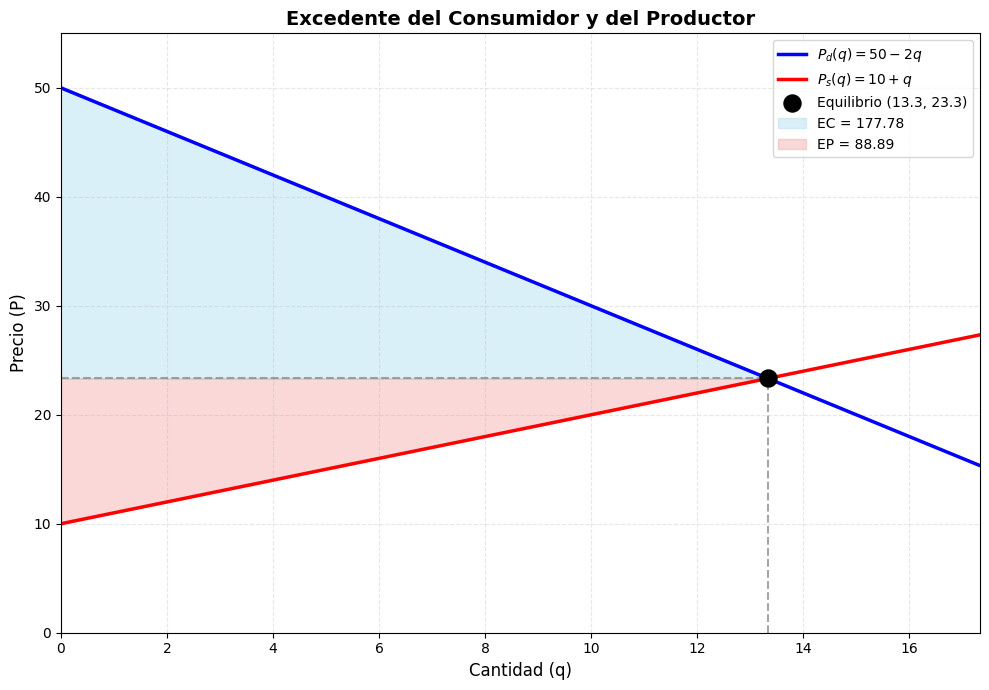

In [36]:
# Preparar datos para graficar
q_grid = np.linspace(0, float(q_eq) * 1.5, 500)
P_d_lambda = sp.lambdify(q, P_d, 'numpy')
P_s_lambda = sp.lambdify(q, P_s, 'numpy')

Pd_num = P_d_lambda(q_grid)
Ps_num = P_s_lambda(q_grid)

# Crear gráfico
plt.figure(figsize=(10, 7))
plt.plot(q_grid, Pd_num, label='$P_d(q) = 50 - 2q$', linewidth=2.5, color='blue')
plt.plot(q_grid, Ps_num, label='$P_s(q) = 10 + q$', linewidth=2.5, color='red')

# Punto de equilibrio
plt.scatter([q_eq], [p_eq], s=150, c='black', zorder=5, label=f'Equilibrio ({q_eq:.1f}, {p_eq:.1f})')
plt.vlines(q_eq, 0, p_eq, linestyles='--', color='gray', alpha=0.7)
plt.hlines(p_eq, 0, q_eq, linestyles='--', color='gray', alpha=0.7)

# Sombrear excedentes
condicion = (q_grid <= float(q_eq)).tolist()
plt.fill_between(q_grid, Pd_num, float(p_eq), where=condicion, 
                 alpha=0.3, color='skyblue', label=f'EC = {float(EC_sympy):.2f}')
plt.fill_between(q_grid, float(p_eq), Ps_num, where=condicion, 
                 alpha=0.3, color='lightcoral', label=f'EP = {float(EP_sympy):.2f}')

plt.title('Excedente del Consumidor y del Productor', fontsize=14, fontweight='bold')
plt.xlabel('Cantidad (q)', fontsize=12)
plt.ylabel('Precio (P)', fontsize=12)
plt.legend(fontsize=10, loc='best')
plt.grid(True, alpha=0.3, linestyle='--')
plt.xlim(0, float(q_eq) * 1.3)
plt.ylim(0, max(Pd_num) * 1.1)
plt.tight_layout()
plt.show()

### ✅ Paso 7: Interpretación económica

In [37]:
print("✅ PASO 7 - INTERPRETACIÓN ECONÓMICA")
print("=" * 60)
print(f"En equilibrio: q* = {float(q_eq):.2f} unidades, p* = ${float(p_eq):.2f}")
print()
print("EXCEDENTE DEL CONSUMIDOR (EC):")
print(f"  Valor: ${float(EC_sympy):.2f}")
print(f"  Representa el beneficio adicional que obtienen los consumidores")
print(f"  por pagar ${float(p_eq):.2f} en lugar de su disposición máxima a pagar.")
print(f"  Suma de: ∫[0,{float(q_eq):.1f}] [P_d(q) - {float(p_eq):.2f}] dq")
print()
print("EXCEDENTE DEL PRODUCTOR (EP):")
print(f"  Valor: ${float(EP_sympy):.2f}")
print(f"  Representa el beneficio adicional que obtienen los productores")
print(f"  por vender a ${float(p_eq):.2f} en lugar de su costo marginal.")
print(f"  Suma de: ∫[0,{float(q_eq):.1f}] [{float(p_eq):.2f} - P_s(q)] dq")
print()
print("EXCEDENTE TOTAL (ET):")
print(f"  Valor: ${float(ET_sympy):.2f}")
print(f"  Mide el bienestar social total generado por este mercado.")
print(f"  Un mercado competitivo maximiza este excedente.")
print()
print("Aplicación empresarial:")
print("  • Políticas de precios: ¿Cómo afecta un cambio de precio a EC y EP?")
print("  • Regulación: ¿Qué impacto tiene un impuesto o subsidio?")
print("  • Eficiencia: El ET mide la ganancia social del intercambio.")

✅ PASO 7 - INTERPRETACIÓN ECONÓMICA
En equilibrio: q* = 13.33 unidades, p* = $23.33

EXCEDENTE DEL CONSUMIDOR (EC):
  Valor: $177.78
  Representa el beneficio adicional que obtienen los consumidores
  por pagar $23.33 en lugar de su disposición máxima a pagar.
  Suma de: ∫[0,13.3] [P_d(q) - 23.33] dq

EXCEDENTE DEL PRODUCTOR (EP):
  Valor: $88.89
  Representa el beneficio adicional que obtienen los productores
  por vender a $23.33 en lugar de su costo marginal.
  Suma de: ∫[0,13.3] [23.33 - P_s(q)] dq

EXCEDENTE TOTAL (ET):
  Valor: $266.67
  Mide el bienestar social total generado por este mercado.
  Un mercado competitivo maximiza este excedente.

Aplicación empresarial:
  • Políticas de precios: ¿Cómo afecta un cambio de precio a EC y EP?
  • Regulación: ¿Qué impacto tiene un impuesto o subsidio?
  • Eficiencia: El ET mide la ganancia social del intercambio.


---

## 📊 EJEMPLO 3: Costo Variable Acumulado desde Costo Marginal

### Contexto
Una empresa manufacturera tiene una función de costo marginal:

$$CMg(q) = 0.3q^2 + 4q + 20$$

donde $q$ es la cantidad producida. Se conoce que el costo fijo es $CF = 500$.

Se desea:
1. **Obtener la función de costo total** integrando el costo marginal
2. **Calcular el costo variable acumulado** entre $q = 10$ y $q = 30$ unidades

### ✅ Paso 1: Planteo

In [38]:
# Definir variable simbólica
q = sp.symbols('q', real=True, positive=True)

# Función de costo marginal
CMg = 0.3*q**2 + 4*q + 20

# Costo fijo
CF = 500

# Límites para costo variable acumulado
a_cv = 10
b_cv = 30

print("✅ PASO 1 - PLANTEO")
print("=" * 60)
print(f"Costo Marginal: CMg(q) = {CMg}")
print(f"Costo Fijo: CF = ${CF}")
print()
print("Objetivos:")
print(f"  1. Hallar C(q) integrando CMg(q)")
print(f"  2. Calcular CV acumulado: ∫[{a_cv}, {b_cv}] CMg(q) dq")

✅ PASO 1 - PLANTEO
Costo Marginal: CMg(q) = 0.3*q**2 + 4*q + 20
Costo Fijo: CF = $500

Objetivos:
  1. Hallar C(q) integrando CMg(q)
  2. Calcular CV acumulado: ∫[10, 30] CMg(q) dq


### ✅ Paso 2: Antiderivada y Barrow

In [39]:
# Integrar indefinidamente para obtener CV(q)
CV = sp.integrate(CMg, q)

# Función de costo total: C(q) = CF + CV(q)
C = CF + CV

# Calcular CV acumulado usando Barrow: CV(b) - CV(a)
CV_b = CV.subs(q, b_cv)
CV_a = CV.subs(q, a_cv)
CV_acumulado_barrow = CV_b - CV_a

print("✅ PASO 2 - ANTIDERIVADA Y BARROW")
print("=" * 60)
print(f"Costo Variable (antiderivada): CV(q) = {CV}")
print(f"Costo Total: C(q) = {C}")
print()
print(f"Costo Variable Acumulado [{a_cv}, {b_cv}]:")
print(f"  CV({b_cv}) = {CV_b}")
print(f"  CV({a_cv}) = {CV_a}")
print(f"  CV({b_cv}) - CV({a_cv}) = {CV_acumulado_barrow}")

✅ PASO 2 - ANTIDERIVADA Y BARROW
Costo Variable (antiderivada): CV(q) = 0.1*q**3 + 2.0*q**2 + 20.0*q
Costo Total: C(q) = 0.1*q**3 + 2.0*q**2 + 20.0*q + 500

Costo Variable Acumulado [10, 30]:
  CV(30) = 5100.00000000000
  CV(10) = 500.000000000000
  CV(30) - CV(10) = 4600.00000000000


### ✅ Paso 3: Integración con SymPy

In [40]:
# Calcular CV acumulado usando integral definida
CV_acumulado_sympy = sp.integrate(CMg, (q, a_cv, b_cv))

print("✅ PASO 3 - INTEGRACIÓN CON SYMPY")
print("=" * 60)
print(f"CV acumulado = ∫[{a_cv}, {b_cv}] CMg(q) dq")
print(f"             = ∫[{a_cv}, {b_cv}] ({CMg}) dq")
print(f"             = {CV_acumulado_sympy}")
print()
print(f"Verificación con Barrow:")
print(f"  Barrow: {CV_acumulado_barrow}")
print(f"  SymPy:  {CV_acumulado_sympy}")
print(f"  ¿Coinciden? {CV_acumulado_barrow == CV_acumulado_sympy} ✓")

✅ PASO 3 - INTEGRACIÓN CON SYMPY
CV acumulado = ∫[10, 30] CMg(q) dq
             = ∫[10, 30] (0.3*q**2 + 4*q + 20) dq
             = 4600.00000000000

Verificación con Barrow:
  Barrow: 4600.00000000000
  SymPy:  4600.00000000000
  ¿Coinciden? True ✓


### ✅ Paso 4: Verificación

In [41]:
# Verificar que la derivada de CV recupera CMg
derivada_CV = sp.diff(CV, q)

print("✅ PASO 4 - VERIFICACIÓN")
print("=" * 60)
print(f"Costo Variable: CV(q) = {CV}")
print(f"Derivada: CV'(q) = {derivada_CV}")
print(f"Costo Marginal original: CMg(q) = {CMg}")
print(f"¿CV'(q) = CMg(q)? {sp.simplify(derivada_CV - CMg) == 0} ✓")
print()
print("Esto confirma que CV es la antiderivada correcta de CMg.")

✅ PASO 4 - VERIFICACIÓN
Costo Variable: CV(q) = 0.1*q**3 + 2.0*q**2 + 20.0*q
Derivada: CV'(q) = 0.3*q**2 + 4.0*q + 20.0
Costo Marginal original: CMg(q) = 0.3*q**2 + 4*q + 20
¿CV'(q) = CMg(q)? True ✓

Esto confirma que CV es la antiderivada correcta de CMg.


### ✅ Paso 5: Aproximación numérica

In [42]:
# Aproximación por suma de Riemann
n = 100
q_edges = np.linspace(float(a_cv), float(b_cv), n+1)
q_samples = (q_edges[:-1] + q_edges[1:]) / 2
dq = (float(b_cv) - float(a_cv)) / n

# Evaluar CMg en puntos medios
CMg_lambda = sp.lambdify(q, CMg, 'numpy')
alturas_CMg = CMg_lambda(q_samples)

# Suma de Riemann
CV_riemann = np.sum(alturas_CMg * dq)

# Error
error_abs = abs(float(CV_acumulado_sympy) - CV_riemann)
error_rel = (error_abs / float(CV_acumulado_sympy)) * 100

print("✅ PASO 5 - APROXIMACIÓN NUMÉRICA")
print("=" * 60)
print(f"Subdivisiones: n = {n}")
print(f"Ancho de cada rectángulo: dq = {dq:.2f}")
print()
print(f"Suma de Riemann: ${CV_riemann:.10f}")
print(f"Valor exacto (SymPy): ${float(CV_acumulado_sympy):.10f}")
print(f"Error absoluto: ${error_abs:.10f}")
print(f"Error relativo: {error_rel:.8f}%")
print()
print(f"Con n = {n} subdivisiones, la aproximación es excelente.")

✅ PASO 5 - APROXIMACIÓN NUMÉRICA
Subdivisiones: n = 100
Ancho de cada rectángulo: dq = 0.20

Suma de Riemann: $4599.9800000000
Valor exacto (SymPy): $4600.0000000000
Error absoluto: $0.0200000000
Error relativo: 0.00043478%

Con n = 100 subdivisiones, la aproximación es excelente.


### ✅ Paso 6: Visualización

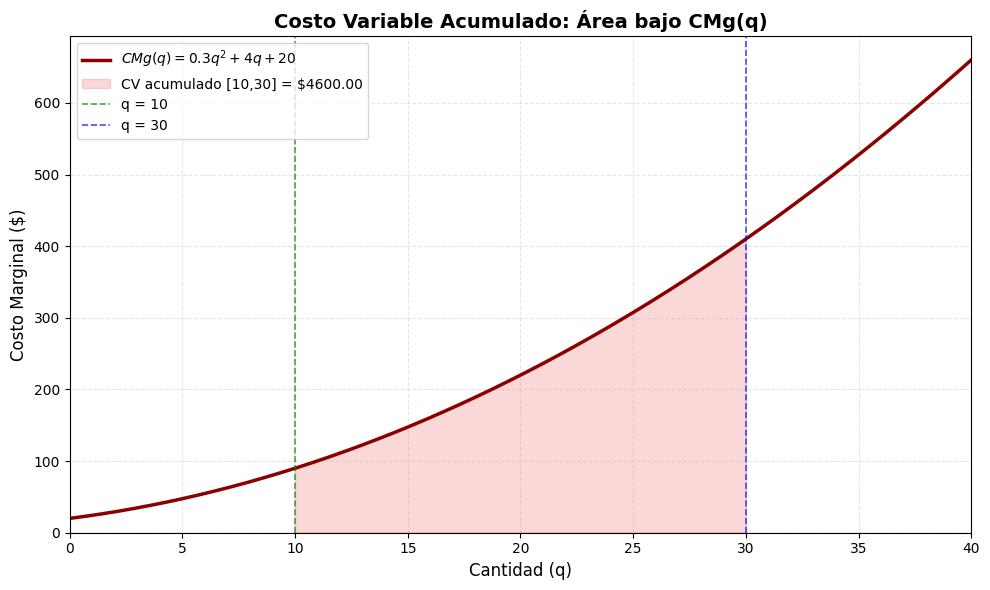

In [43]:
# Preparar datos para graficar
q_grid = np.linspace(0, 40, 500)
CMg_num = CMg_lambda(q_grid)

# Crear gráfico
plt.figure(figsize=(10, 6))
plt.plot(q_grid, CMg_num, label=f'$CMg(q) = {sp.latex(CMg)}$', 
         linewidth=2.5, color='darkred')

# Sombrear área bajo la curva [a_cv, b_cv]
q_fill = np.linspace(float(a_cv), float(b_cv), 300)
CMg_fill = CMg_lambda(q_fill)
plt.fill_between(q_fill, CMg_fill, alpha=0.3, color='lightcoral',
                 label=f'CV acumulado [{a_cv},{b_cv}] = ${float(CV_acumulado_sympy):.2f}')

# Líneas de referencia
plt.axvline(a_cv, color='green', linestyle='--', linewidth=1.2, alpha=0.7, label=f'q = {a_cv}')
plt.axvline(b_cv, color='blue', linestyle='--', linewidth=1.2, alpha=0.7, label=f'q = {b_cv}')
plt.axhline(0, color='black', linewidth=0.8)

plt.title('Costo Variable Acumulado: Área bajo CMg(q)', fontsize=14, fontweight='bold')
plt.xlabel('Cantidad (q)', fontsize=12)
plt.ylabel('Costo Marginal ($)', fontsize=12)
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, alpha=0.3, linestyle='--')
plt.xlim(0, 40)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

### ✅ Paso 7: Interpretación económica

In [44]:
print("✅ PASO 7 - INTERPRETACIÓN ECONÓMICA")
print("=" * 60)
print(f"Función de Costo Total: C(q) = {C}")
print(f"  • Costo Fijo: CF = ${CF}")
print(f"  • Costo Variable: CV(q) = {CV}")
print()
print(f"Costo Variable Acumulado entre q = {a_cv} y q = {b_cv}:")
print(f"  Valor: ${float(CV_acumulado_sympy):.2f}")
print()
print("Significado:")
print(f"  Esta integral representa el costo adicional de producir")
print(f"  desde la unidad {a_cv} hasta la unidad {b_cv}.")
print()
print("Relación con conceptos económicos:")
print(f"  • CMg(q) mide el costo de producir UNA unidad adicional")
print(f"  • ∫[{a_cv},{b_cv}] CMg(q) dq mide el costo de producir TODAS")
print(f"    las unidades adicionales entre {a_cv} y {b_cv}")
print()
print("Aplicación empresarial:")
print(f"  • Presupuesto: ¿Cuánto cuesta aumentar producción de {a_cv} a {b_cv}?")
print(f"  • Decisión: Si el ingreso adicional > ${float(CV_acumulado_sympy):.2f}, conviene producir más")
print(f"  • Punto de equilibrio: Comparar con ingresos marginales acumulados")

✅ PASO 7 - INTERPRETACIÓN ECONÓMICA
Función de Costo Total: C(q) = 0.1*q**3 + 2.0*q**2 + 20.0*q + 500
  • Costo Fijo: CF = $500
  • Costo Variable: CV(q) = 0.1*q**3 + 2.0*q**2 + 20.0*q

Costo Variable Acumulado entre q = 10 y q = 30:
  Valor: $4600.00

Significado:
  Esta integral representa el costo adicional de producir
  desde la unidad 10 hasta la unidad 30.

Relación con conceptos económicos:
  • CMg(q) mide el costo de producir UNA unidad adicional
  • ∫[10,30] CMg(q) dq mide el costo de producir TODAS
    las unidades adicionales entre 10 y 30

Aplicación empresarial:
  • Presupuesto: ¿Cuánto cuesta aumentar producción de 10 a 30?
  • Decisión: Si el ingreso adicional > $4600.00, conviene producir más
  • Punto de equilibrio: Comparar con ingresos marginales acumulados


---

## ✅ Checklist de Verificación para Resolver Integrales Definidas

Utiliza esta lista para asegurar que has completado todos los pasos en tus ejercicios:

### Paso 1: Planteo
- [ ] Variables simbólicas definidas
- [ ] Función $f(x)$ especificada claramente
- [ ] Límites de integración $[a, b]$ identificados
- [ ] Contexto económico del problema explicado

### Paso 2: Antiderivada y Barrow
- [ ] Antiderivada $F(x)$ calculada (con SymPy o manualmente)
- [ ] Evaluación $F(b)$ calculada
- [ ] Evaluación $F(a)$ calculada
- [ ] Diferencia $F(b) - F(a)$ obtenida

### Paso 3: Integración con SymPy
- [ ] Integral definida calculada: `sp.integrate(f, (x, a, b))`
- [ ] Resultado comparado con Paso 2
- [ ] Consistencia verificada

### Paso 4: Verificación
- [ ] Derivada de $F(x)$ calculada: $F'(x)$
- [ ] Comparación: ¿$F'(x) = f(x)$?
- [ ] Simplificación aplicada si es necesario

### Paso 5: Aproximación Numérica
- [ ] Número de subdivisiones $n$ definido
- [ ] Suma de Riemann calculada (punto medio recomendado)
- [ ] Comparación con valor exacto de SymPy
- [ ] Error absoluto y relativo calculados

### Paso 6: Visualización
- [ ] Función $f(x)$ graficada en rango apropiado
- [ ] Área bajo la curva sombreada entre $[a, b]$
- [ ] Líneas verticales en $x = a$ y $x = b$
- [ ] Títulos, etiquetas y leyendas en español
- [ ] Grilla y formato profesional aplicados

### Paso 7: Interpretación Económica
- [ ] Significado del valor numérico explicado
- [ ] Conexión con conceptos económicos (EC, EP, CV, etc.)
- [ ] Aplicación empresarial o de gestión descrita
- [ ] Conclusiones relevantes para toma de decisiones

---

## 📚 Referencias y Conceptos Clave

### Propiedades de Integrales Definidas

1. **Linealidad**: 
   $$\int_a^b [k \cdot f(x) + h(x)] dx = k \int_a^b f(x) dx + \int_a^b h(x) dx$$

2. **Aditividad en intervalos**:
   $$\int_a^b f(x) dx + \int_b^c f(x) dx = \int_a^c f(x) dx$$

3. **Reversión de límites**:
   $$\int_a^b f(x) dx = -\int_b^a f(x) dx$$

### Aplicaciones Económicas Principales

| Concepto | Fórmula | Interpretación |
|----------|---------|----------------|
| **Excedente del Consumidor** | $EC = \int_0^{q^*} [P_d(q) - p^*] dq$ | Beneficio neto de los consumidores |
| **Excedente del Productor** | $EP = \int_0^{q^*} [p^* - P_s(q)] dq$ | Beneficio neto de los productores |
| **Costo Variable** | $CV(q) = \int_0^q CMg(t) dt$ | Costo adicional desde 0 hasta q |
| **Ingreso Acumulado** | $\int_{q_1}^{q_2} IMg(q) dq$ | Ingreso adicional entre $q_1$ y $q_2$ |

### Relación entre Derivada e Integral

**Teorema Fundamental del Cálculo**:

$$\frac{d}{dx}\left[\int_a^x f(t) dt\right] = f(x)$$

Esto significa que derivar e integrar son **operaciones inversas**.

---

## 🎯 Ejercicios Propuestos

### Ejercicio 1: Función Exponencial
Calcular $\int_0^5 e^{0.2q} dq$ siguiendo los 7 pasos. Interpretar como tasa de crecimiento de ventas.

### Ejercicio 2: Mercado con Impuesto
Dadas $P_d(q) = 100 - 3q$ y $P_s(q) = 20 + 2q$, calcular EC y EP antes y después de un impuesto $t = 10$.

### Ejercicio 3: Beneficio Acumulado
Con $IMg(q) = 80 - 4q$ y $CMg(q) = 20 + 2q$, calcular el beneficio acumulado entre $q = 5$ y $q = 10$.

---

## 📖 Notas Finales

Esta guía completa ha cubierto:

✅ **Fundamentos teóricos** de integrales definidas  
✅ **Metodología de 7 pasos** aplicable a cualquier problema  
✅ **Tres ejemplos completos** con contexto económico  
✅ **Verificación exhaustiva** en cada paso  
✅ **Visualizaciones** para comprensión geométrica  
✅ **Interpretaciones económicas** para aplicación práctica  

**Recuerda**: La integral definida no solo es una herramienta matemática, sino un **concepto fundamental** para cuantificar acumulados en economía, finanzas y gestión empresarial.

---

**Laboratorio de Métodos Cuantitativos Aplicados a la Gestión - FCE-UBA**